# Introduction to machine learning: labwork2

# Reading and visualizing the dataset

In [23]:
%matplotlib inline
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
import pandas as pd

data = pd.read_csv(r"/Volumes/D/py-workspace/PFE/dataset/Input/outband_QoS_ITU-QoE.csv")
data = data.dropna()

print(data.columns.values)
# Map Continuous target to class
#data['QoE_ITU_JT_046_VP9_1280x780'] = data['QoE_ITU_JT_046_VP9_1280x780'].apply(lambda x: str(_map_class(x)))

#X = data.drop(['QoE_ITU_JT_046_VP9_1280x780', 'outbandQoS_RTT_STD (ms)'] , axis='columns') # attributes
#y = data['QoE_ITU_JT_046_VP9_1280x780'] # labels

# # Import numpy, generate the feature matrix and the output y
X = data[['outbandQoS_DL_TP (kbps)', 'outbandQoS_UL_TP (kbps)', 'outbandQoS_RTT (ms)', 'outbandQoS_LOSS (ratio)']].values
y = data[['QoE_ITU_JT_046_VP9_1280x780']].values

# Print the first row
print("X: ", X[0, :])
#print("Y: ", y[0, :])

['outbandQoS_DL_TP (kbps)' 'outbandQoS_UL_TP (kbps)' 'outbandQoS_RTT (ms)'
 'outbandQoS_RTT_STD (ms)' 'outbandQoS_LOSS (ratio)'
 'QoE_ITU_JT_046_VP9_1280x780']
X:  [2.21530127e+03 1.05268433e+02 5.54525805e+00 3.65501880e-03]


## Scatter plots for $y$ against each feature

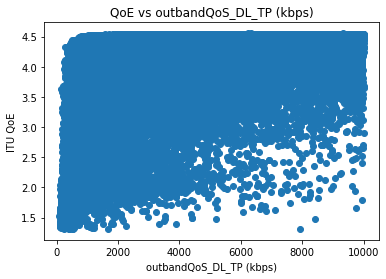

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0], y) # first column of X
plt.title("QoE vs outbandQoS_DL_TP (kbps)")
plt.xlabel("outbandQoS_DL_TP (kbps)")
plt.ylabel("ITU QoE");

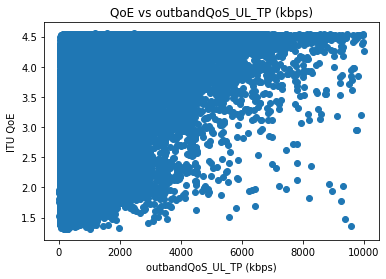

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,1], y) # first column of X
plt.title("QoE vs outbandQoS_UL_TP (kbps)")
plt.xlabel("outbandQoS_UL_TP (kbps)")
plt.ylabel("ITU QoE");

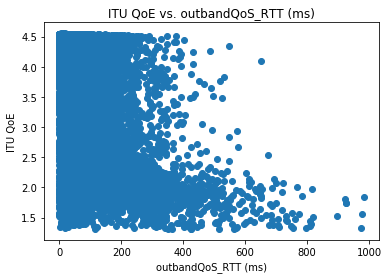

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,2], y) # first column of X
plt.title("ITU QoE vs. outbandQoS_RTT (ms)")
plt.xlabel("outbandQoS_RTT (ms)")
plt.ylabel("ITU QoE");

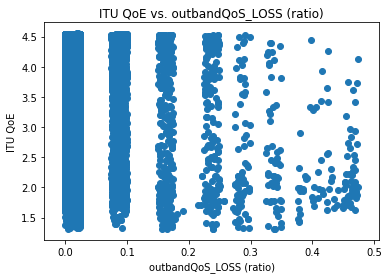

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,3], y) # first column of X
plt.title("ITU QoE vs. outbandQoS_LOSS (ratio)")
plt.xlabel("outbandQoS_LOSS (ratio)")
plt.ylabel("ITU QoE");

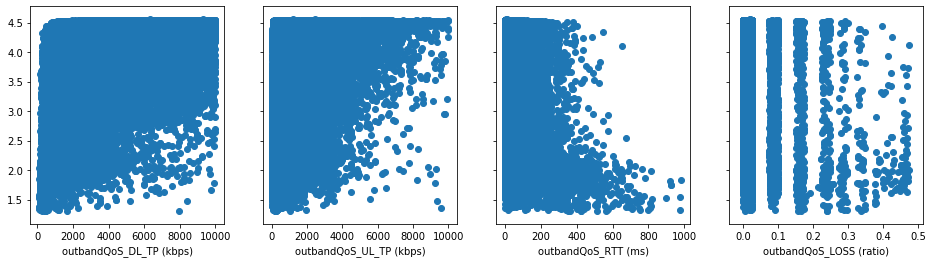

In [29]:
# Subplot to plot the data side by side
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 4, sharey=True, figsize=(16, 4))
#fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].scatter(X[:, 0], y)
axs[1].scatter(X[:, 1], y)
axs[2].scatter(X[:, 2], y);
axs[3].scatter(X[:, 3], y);

axs[0].set_xlabel("outbandQoS_DL_TP (kbps)");
axs[1].set_xlabel("outbandQoS_UL_TP (kbps)");
axs[2].set_xlabel("outbandQoS_RTT (ms)");
axs[3].set_xlabel("outbandQoS_LOSS (ratio)");
# plt.scatter(X[:,2], Y) # first column of X
# plt.title("Newspaper vs. Radio Adverstising")
# plt.xlabel("Newspaper")
# plt.ylabel("Sales");

### Simple Linear Regression for ITU

#### Import linear regression functions from Scikit-learn

In [30]:
from sklearn import linear_model

#### Linear regression for the feature TV advertising budget

In [31]:
linear_1 = linear_model.LinearRegression()
# linear_1.fit(X[:, 0], Y) # it extracts in array without second dimension
linear_1.fit(X[:, 0].reshape(-1, 1), y) # it extracts in array without second dimension


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print('beta 0 = {}, beta 1 = {}'.format(linear_1.intercept_[0], linear_1.coef_[0]))

beta 0 = 3.3075953566419636, beta 1 = [0.00018661]


In [33]:
residuals = y - linear_1.predict(X[1,0].reshape(-1, 1))
# print(residuals)
MSE_1 = (1/(len(y) -2))*np.sum(residuals**2)
print(MSE_1)

RMSE_1 = np.sqrt(MSE_1)
print(RMSE_1)

R_2_1 = linear_1.score(X[:, 0].reshape(-1, 1), y)
print(R_2_1)

0.9216634085974481
0.9600330247431326
0.24346801042195246


#### Draw the prediction line

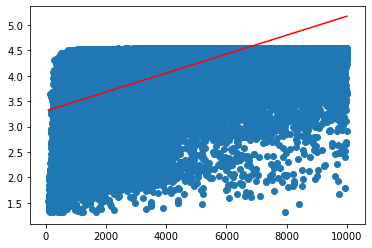

In [52]:
X_test = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 20)
y_hat = linear_1.predict(x_test.reshape(-1, 1)) # Scikit learn needs matrix or column vector
plt.plot(X_test, y_hat, c= 'r') # to draw a line
plt.scatter(X[:, 0], Y);

## C. Multiple linear regression with 2 or 3 explanatory variables

In [35]:
linreg_1234 = linear_model.LinearRegression()
linreg_1234.fit(X, y)
print('beta_0 = {}, beta_1 beta_2 beta_3 beta_4= {}'.format(
                  linreg_1234.intercept_[0],linreg_1234.coef_))
MSE_1234 = (1/(len(y)))*np.sum((y-linreg_1234.predict(X))**2)
RMSE_1234= np.sqrt(MSE_1234)
print('MSE = {}, RMSE = {}'.format(MSE_1234,RMSE_1234))
print('R^2 = {}'.format(linreg_1234.score(X, y)))

beta_0 = 3.543078220276334, beta_1 beta_2 beta_3 beta_4= [[ 1.63054853e-04  2.08687631e-05 -3.90490853e-03 -2.26186349e+00]]
MSE = 0.4752924817279241, RMSE = 0.6894145934979359
R^2 = 0.3053651194952288
